In [5]:
#importing packages
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#defining function 
#reference: http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                    caching=True,
                                    check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function and printing text
text = extract_text_from_pdf(r'C:\Users\proud\DAAN Capstone Proj\Q1data\InnovationData.pdf')
print(text)

Agricultural Institute of Canada - An Overview of the Canadian Agricultural Innovation System  |  1An Overview of the Canadian Agricultural Innovation SystemExtended VersionAgricultural Institute of CanadaInstitut agricole du CanadaAgricultural Institute of Canada#320 - 176 Gloucester Street, Ottawa, ON, Canada  K2P 0A6This report should be cited as:AIC (2017), An Overview of the Canadian Agricultural Innovation System. Ottawa, ON: Agricultural Institute of Canada.AcknowledgementsThe research for this report was done by the Agricultural Institute of Canada (AIC).  A summary of this study was prepared with financial and logistical support from the Canada Foundation for Innovation (CFI).The design, method and content of this document were determined by AIC. The report was written by Gloria Sánchez and edited by Bridget Schrempf. An Overview of the Canadian Agricultural Innovation SystemReleased July 2017This document may be downloaded from www.aic.ca© 2017 Agricultural Institute of Cana

In [6]:
#importing packeges for cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

#--------------------------------------------------------------------------------------

#removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#--------------------------------------------------------------------------------------
#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#--------------------------------------------------------------------------------------

#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#--------------------------------------------------------------------------------------

#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "D", "Canada", 'industry', 'research', 'sector', 'agriculture', 'agricultural']
def remove_stopwords(text):
    word_list = text.split()
    word_list = [word for word in word_list if word not in stop_words]
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_stopwords)(text)
text = text.tolist()
print(text)

Agricultural Institute An Overview Canadian Agricultural Innovation System An Overview Canadian Agricultural Innovation SystemExtended VersionAgricultural Institute CanadaInstitut agricole du Agricultural Institute Gloucester Street Ottawa ON KP AThis report cited as:AIC An Overview Canadian Agricultural Innovation System Ottawa ON Agricultural Institute Canada.AcknowledgementsThe report done Agricultural Institute AIC A summary study prepared financial logistical support Foundation Innovation CFI).The design method content document determined AIC The report written Gloria Sánchez edited Bridget Schrempf An Overview Canadian Agricultural Innovation SystemReleased July This document may downloaded www.aic.ca© Agricultural Institute CanadaAgricultural Institute CanadaInstitut agricole du Agricultural Institute An Overview Canadian Agricultural Innovation System Founded Agricultural Institute AIC Canada’s organization whose sole focus innovation mission voice national level AICs mandate i

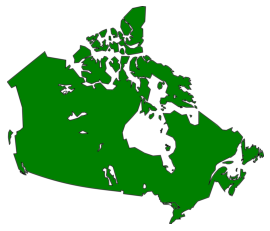

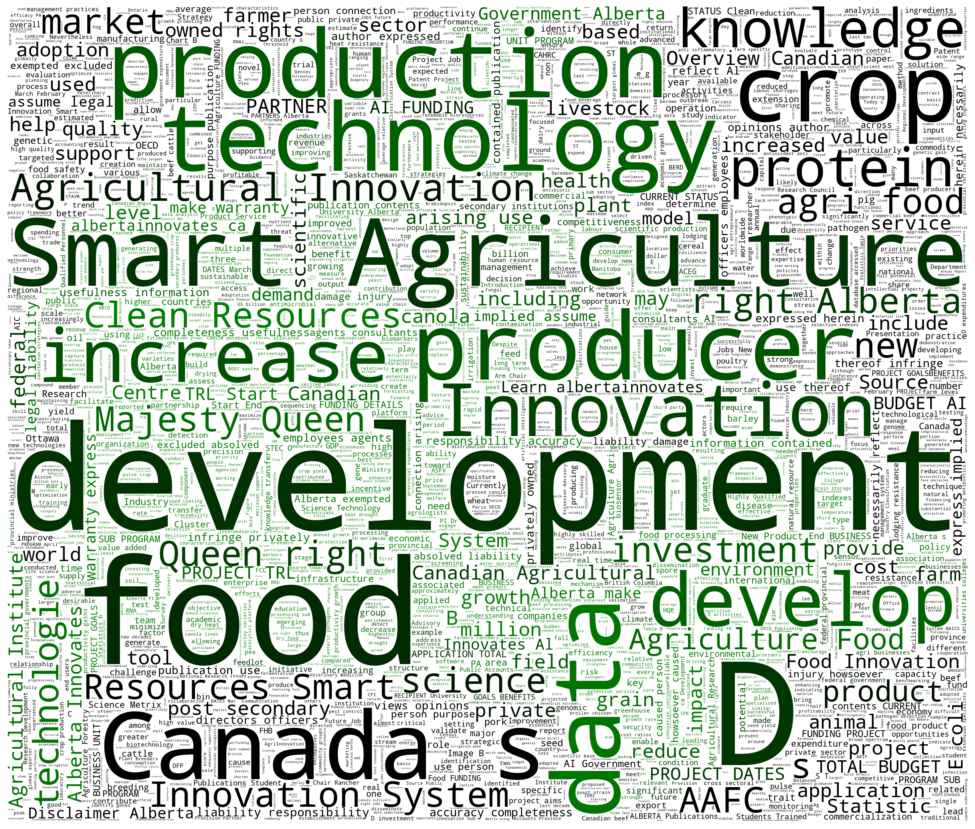

In [7]:
#importing packages
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------

#setting mask image
mask = np.array(Image.open(r'C:\Users\proud\DAAN Capstone Proj\Q1data\canada-clipart-map-outline-png-13.png'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000, contour_color="black", max_words=10000, relative_scaling = 0, background_color = "white").generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('Q1data/innovWordCould.png')
_=plt.show()


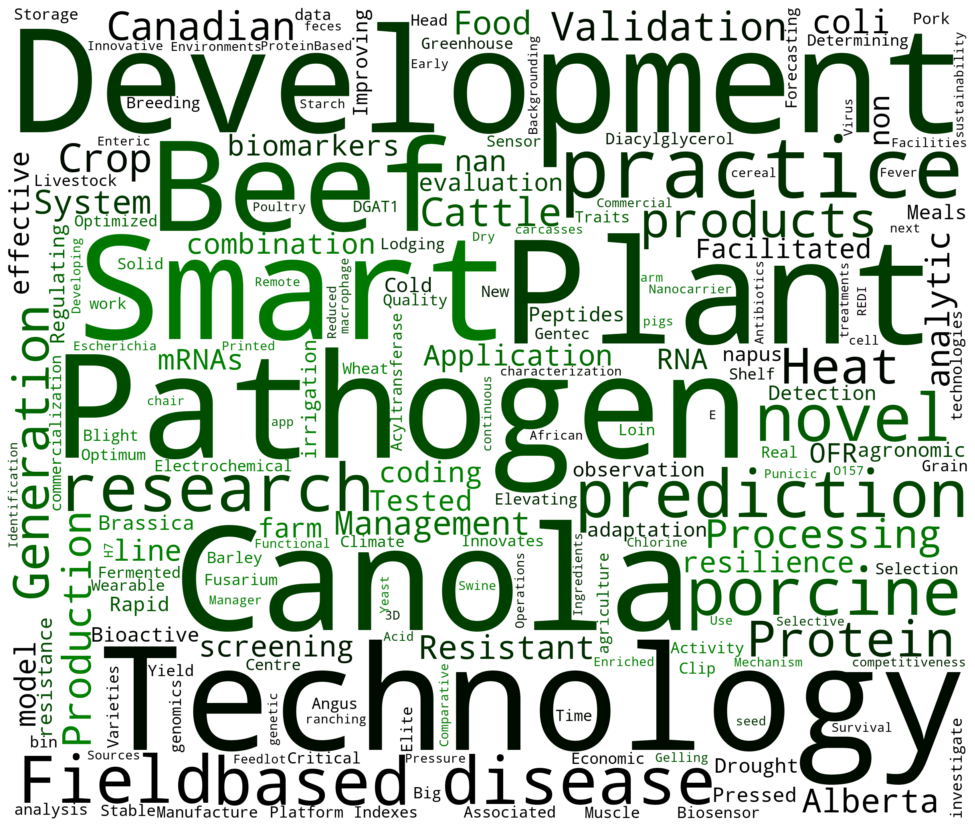

In [13]:
import pandas as pd
InnovData = pd.read_excel("Q1data/Innovation Funding.xlsx")
description = InnovData['Detail']
wordcloud = WordCloud(mask=mask, width=2000, height=1000, contour_color="black", max_words=10000, relative_scaling = 0, background_color = "white").generate(' '.join(InnovData['Detail'].astype(str)))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('Q1data/innovDescWordCloud.png')
_=plt.show()